In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
data.shape

(112, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
corr = data.corr(method="pearson")

<Axes: >

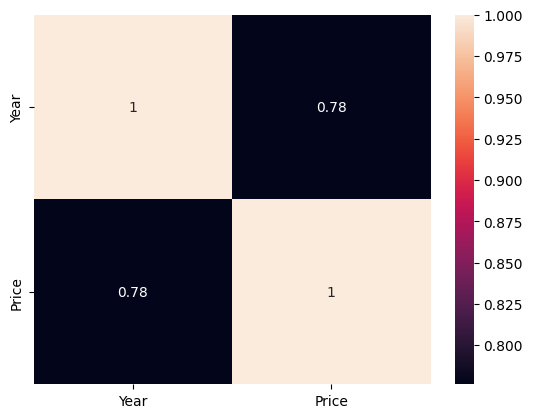

In [7]:
sns.heatmap(corr,annot=True)

[Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '22'),
 Text(0, 0, '6'),
 Text(0, 0, '47'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '4')]

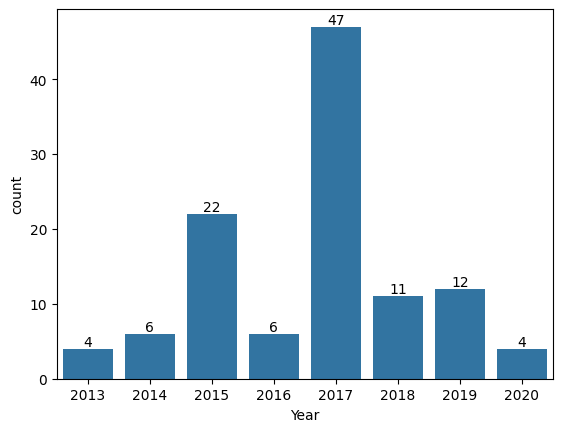

In [8]:
ax = sns.countplot(x="Year",data=data)
ax.bar_label(ax.containers[0])

[Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '1'),
 Text(0, 0, '11'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '20'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

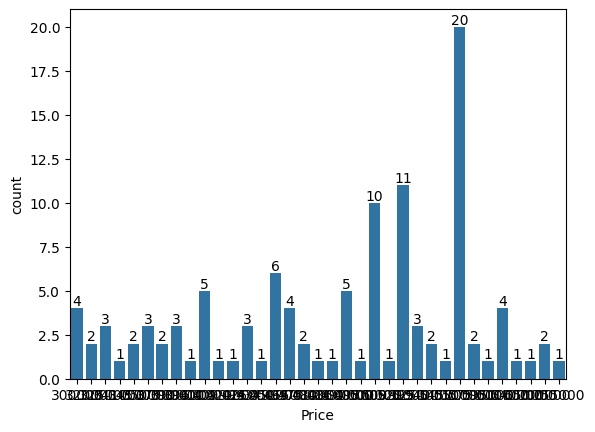

In [9]:
ax = sns.countplot(x="Price",data=data)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Year', ylabel='Price'>

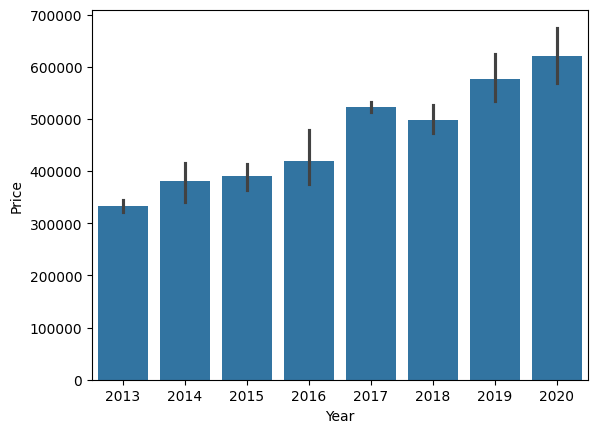

In [10]:
sns.barplot(x="Year",y="Price",data=data)

<Axes: xlabel='Year', ylabel='Price'>

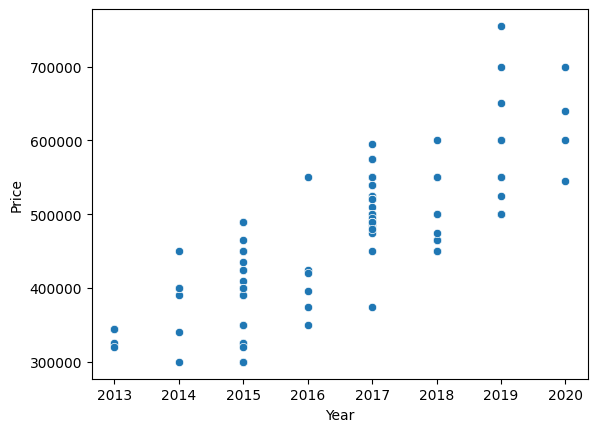

In [11]:
sns.scatterplot(x="Year",y="Price",data=data)

**As year increases, the price of the car also increases**


Linear Relationship

In [12]:
y = data['Price']
X = data.drop(['Price'],axis = 1)

In [13]:
X.shape

(112, 1)

In [14]:
y.shape

(112,)

In [15]:
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(112, 1)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(89, 1) (23, 1) (89, 1) (23, 1)


In [18]:
from sklearn.linear_model import LinearRegression, Lasso
Ln_model = LinearRegression()
Ln_model.fit(X_train,y_train)
y_predictions = Ln_model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Mean Squared Eroor of the model is ", mean_squared_error(y_predictions,y_test))
print("Mean Absolute Eroor of the model is ", mean_absolute_error(y_predictions,y_test))
print("R2 score of the model is ", r2_score(y_predictions,y_test))


Mean Squared Eroor of the model is  0.52470677333406
Mean Absolute Eroor of the model is  0.5895295935049284
R2 score of the model is  0.4052626156691991


In [20]:
X1 = data[['Year']]
y1 = data['Price']

Ln_model2 = LinearRegression().fit(X1,y1)

In [21]:
coeficient = Ln_model2.coef_[0]
intercept = Ln_model2.intercept_

print("Coefficient: ",coeficient)
print("intercept: ",intercept)

Coefficient:  43453.37988792974
intercept:  -87147246.05488417


In [22]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
y_predictions_dt = dt_model.predict(X_test)

In [23]:
print("Mean Squared Eroor of the model is ", mean_squared_error(y_predictions_dt,y_test))
print("Mean Absolute Eroor of the model is ", mean_absolute_error(y_predictions_dt,y_test))
print("R2 score of the model is ", r2_score(y_predictions_dt,y_test))



Mean Squared Eroor of the model is  0.436445992966216
Mean Absolute Eroor of the model is  0.5117343552418352
R2 score of the model is  0.46097493643963217


Lasso Regression

In [24]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [25]:
lasso_train_mse = mean_squared_error(y_train, Ln_model.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, Ln_model.predict(X_test))

In [28]:
print("Mean square error of the model",lasso_train_mse)
print("Mean Absolute Error of the model",lasso_test_mse)

Mean square error of the model 0.3768081669829334
Mean Absolute Error of the model 0.52470677333406


Possible price prediction

In [33]:
predicted_price_linear_reg = Ln_model.predict([[2022]])
predicted_price_lasso_reg = lasso_model.predict([[2022]])

print("Predicted price using linear Regression:",predicted_price_linear_reg)
print("Predicted price using lasso Regression:",predicted_price_lasso_reg)

Predicted price using linear Regression: [[1719.84803972]]
Predicted price using lasso Regression: [1500.47274944]


predicted price of Grand i10 using Linear Regression is more than the Lasso Rgression